In [2]:
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import geopandas as gp
import os
import regionmask

#Prequesites
font = {'weight' : 'bold',
        'size'   : 16}
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', **font)

min_lon = 78.00
max_lon = 96.00
min_lat = 8.00
max_lat = 23.00


# Windspeed

In [76]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5/')

#PreMon
file='U-Wind/PreMonDaily_Uwind850.nc'
ds=xr.open_dataset(file)

# #Clipping to shape File and Creating Mask File
# shapefile ="/Volumes/ACIML/Main/SHPs/BOB_OCEAN/BOB_OCEAN.shp"
# countries=gp.read_file(shapefile,engine='pyogrio')
# c_list=list(countries['featurecla'])
# c_list_unique=set(list(countries['featurecla']))
# indexes=[c_list.index(x) for x in c_list_unique]
# countries_mask_poly=regionmask.Regions(outlines=countries.geometry[indexes],name='featurecla',numbers=indexes,names=countries.featurecla[indexes])
# print('It is Clipping')
# mask=countries_mask_poly.mask(ds,lat_name='latitude',lon_name='longitude')
# masked_shape=ds.where(mask==0)
# ds = masked_shape.sel(latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))


u=ds.u


file='V-Wind/PreMonDaily_Vwind850.nc'
ds=xr.open_dataset(file)

# masked_shape=ds.where(mask==0)
# ds = masked_shape.sel(latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))


v=ds.v
# Compute the wind speed
wind_speed = np.sqrt(u**2 + v**2)
wind_speedMean=wind_speed.mean(dim='time', skipna=True)
lon,lat=wind_speedMean.indexes.values()


In [80]:
#Winter
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5/')
file='U-Wind/WinterDaily_Uwind850.nc'
ds=xr.open_dataset(file)

# #Clipping to shape File and Creating Mask File
# shapefile ="/Volumes/ACIML/Main/SHPs/BOB_OCEAN/BOB_OCEAN.shp"
# countries=gp.read_file(shapefile,engine='pyogrio')
# c_list=list(countries['featurecla'])
# c_list_unique=set(list(countries['featurecla']))
# indexes=[c_list.index(x) for x in c_list_unique]
# countries_mask_poly=regionmask.Regions(outlines=countries.geometry[indexes],name='featurecla',numbers=indexes,names=countries.featurecla[indexes])
# print('It is Clipping')
# mask=countries_mask_poly.mask(ds,lat_name='latitude',lon_name='longitude')
# masked_shape=ds.where(mask==0)
# ds = masked_shape.sel(latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))
u=ds.u


file='V-Wind/WinterDaily_Vwind850.nc'
ds=xr.open_dataset(file)
# masked_shape=ds.where(mask==0)
# ds = masked_shape.sel(latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))

v=ds.v
# Compute the wind speed
wind_speed = np.sqrt(u**2 + v**2)
wind_speedMean=wind_speed.mean(dim='time', skipna=True)
lon,lat=wind_speedMean.indexes.values()



# RelativeHumidity Average

In [40]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA-5 RH/')

#PreMon
file='PreMon/PreMonDaily_RHavg.nc'
ds=xr.open_dataset(file)
RH=ds.r
RHMean=RH.mean(dim='time', skipna=True)
lon,lat=RHMean.indexes.values()

In [42]:
#Winter
file='Winter/WinterDaily_RHavg.nc'
ds=xr.open_dataset(file)
RH=ds.r
RHMean=RH.mean(dim='time', skipna=True)
lon,lat=RHMean.indexes.values()

# PBLH

In [12]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/PBLH/')
#unit - m
#PreMon
file='PreMonDaily_PBLH.nc'
ds=xr.open_dataset(file)
PBLH=ds.TCZPBL
PBLHMean=PBLH.mean(dim='time', skipna=True)
lat,lon=PBLHMean.indexes.values()

In [14]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/PBLH/')

#Winter
file='WinterDaily_PBLH.nc'
ds=xr.open_dataset(file)
PBLH=ds.TCZPBL
PBLHMean=PBLH.mean(dim='time', skipna=True)
lon,lat=PBLHMean.indexes.values()

# Vertical Velocity

In [26]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5/VerticalVelocity/')

#PreMon
file='PreMonDaily_VerticalVelocity.nc'
ds=xr.open_dataset(file)
W=ds.w
WMean=W.mean(dim='time', skipna=True)
lon,lat=WMean.indexes.values()

In [29]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5/VerticalVelocity/')

#Winter
file='WinterDaily_VerticalVelocity.nc'
ds=xr.open_dataset(file)
W=ds.w
WMean=W.mean(dim='time', skipna=True)
lon,lat=WMean.indexes.values()

# AODs

In [67]:
#PreMon
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/MERRA2/')
file='Composites/N_MERRA-PreMon.nc'
ds=xr.open_dataset(file)

ANANOD=ds.BC_AOD+ds.OC_AOD+ds.SULFATE_AOD
OGAOD=ds.SEASALT_AOD+ds.DUST_AOD

ANANODMean=ANANOD.mean(dim='time', skipna=True)
OGAODMean=OGAOD.mean(dim='time', skipna=True)
lat,lon,time=ds.indexes.values()

In [71]:
#Winter
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/MERRA2/')
file='Composites/N_MERRA-Winter.nc'
ds=xr.open_dataset(file)

ANANOD=ds.BC_AOD+ds.OC_AOD+ds.SULFATE_AOD
OGAOD=ds.SEASALT_AOD+ds.DUST_AOD

ANANODMean=ANANOD.mean(dim='time', skipna=True)
OGAODMean=OGAOD.mean(dim='time', skipna=True)
lat,lon,time=ds.indexes.values()

# AI

In [73]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/MERRA2/')

#PreMon
file='MERRA-PreMon.nc'
ds=xr.open_dataset(file)
AI=ds.AI
AIMean=AI.mean(dim='time', skipna=True)
lat,lon=AIMean.indexes.values()

In [74]:

#Winter
file='MERRA-Winter.nc'
ds=xr.open_dataset(file)
AI=ds.AI
AIMean=AI.mean(dim='time', skipna=True)
lat,lon=AIMean.indexes.values()

# Atmospheric WaterVapour


In [105]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/PrecipitableWater-MODIS/')

#PreMon
file='PreMonDaily_PrecipWater.nc'
ds=xr.open_dataset(file)
WV=ds.Atmospheric_Water_Vapor_QA_Mean
WVMean=WV.mean(dim='time', skipna=True)
lon,lat=WVMean.indexes.values()

In [107]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/PrecipitableWater-MODIS/')

#Winter
file='WinterDaily_PrecipWater.nc'
ds=xr.open_dataset(file)
WV=ds.Atmospheric_Water_Vapor_QA_Mean
WVMean=WV.mean(dim='time', skipna=True)
lon,lat=WVMean.indexes.values()

# LTS

In [113]:
#Clipping to shape File and Creating Mask File
shapefile ="/Volumes/ACIML/Main/SHPs/BOB_OCEAN/BOB_OCEAN.shp"
countries=gp.read_file(shapefile,engine='pyogrio')
c_list=list(countries['featurecla'])
c_list_unique=set(list(countries['featurecla']))
indexes=[c_list.index(x) for x in c_list_unique]
countries_mask_poly=regionmask.Regions(outlines=countries.geometry[indexes],name='featurecla',numbers=indexes,names=countries.featurecla[indexes])
# print('It is Clipping')


In [123]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5/LTS')

#PreMon
file='PreMonDaily_LTS.nc'
ds=xr.open_dataset(file)
mask=countries_mask_poly.mask(ds,lat_name='latitude',lon_name='longitude')
masked_shape=ds.where(mask==0)
ds = masked_shape.sel(latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))
LTS=ds.t
LTSMean=LTS.mean(dim='time', skipna=True)
lon,lat=LTSMean.indexes.values()

In [125]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5/LTS')

#Winter
file='WinterDaily_LTS.nc'
ds=xr.open_dataset(file)
mask=countries_mask_poly.mask(ds,lat_name='latitude',lon_name='longitude')
masked_shape=ds.where(mask==0)
ds = masked_shape.sel(latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))
LTS=ds.t
LTSMean=LTS.mean(dim='time', skipna=True)
lon,lat=LTSMean.indexes.values()

# Plotter

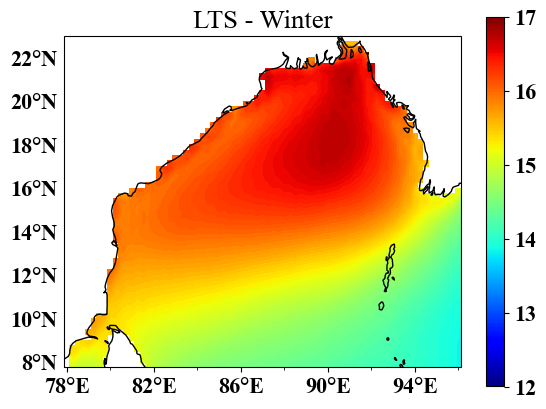

<Figure size 640x480 with 0 Axes>

In [126]:
os.chdir('/Volumes/ACIML/Main/')

vmin=12
vmax=17

# data=wind_speedMean
# name='MeanWind-Winter'

# data=RHMean
# name='RealtiveHumidity-Winter'

# data=PBLHMean
# name='PBLH-Winter'

# data=WMean
# name='VerticalVelocity-Winter'

# data=OGAODMean
# name='OrganicAOD - Winter'

# data=WVMean
# name='Atmospheric Water Vapor - Winter'


data=LTSMean
name='LTS - Winter'


ax = plt.axes(projection=ccrs.PlateCarree())

plt.pcolor(lon, lat, data,
            transform=ccrs.PlateCarree(),cmap='jet',vmax=vmax,vmin=vmin)
plt.colorbar()    

plt.contourf(lon, lat, data,60,
            transform=ccrs.PlateCarree(),cmap='jet',vmax=vmax,vmin=vmin)


# ,vmax=vmax,vmin=vmin
plt.title(name)
ax.coastlines()
gridlines = ax.gridlines(draw_labels=True,linewidth=0)
gridlines.top_labels = False
gridlines.right_labels = False
gridlines.bottom_labels=False


major_tick = [80,84,88,92,96]
minor_tick = [78,82,86,90,94]
ax.set_xticks(minor_tick) # Grid
ax.set_xticks(major_tick, minor=True)

major_tick1 = ['78°E','82°E','86°E','90°E','94°E']
ax.set_xticklabels(major_tick1) # Grid

 
#INCLUDE FOR WIND ONLY
# u=u.mean(dim='time', skipna=True)
# v=v.mean(dim='time', skipna=True)
# #Making Alternative Grid nana to make it less populated
# u[::2,::2]=np.nan
# u[1::2,1::2]=np.nan

# v[::2,::2]=np.nan
# v[1::2,1::2]=np.nan
# # ax.quiver(lon, lat, u, v,units='xy', scale=10, color='black',width =0.025,headwidth=6,headlength=8)

# ax.set_facecolor("black")
plt.savefig(name+'.png',dpi=300)
# # ax.legend()

plt.show()
plt.clf()
